# The Woman King - Twitter Sentiment Analysis
### By Ogechi Maryann Okafor

This project focuses on using Natural Processing Language(NLP) to analyze tweets sentiment about the movie, "The Woman King". 
Using the sentiment to discover how much impact this type of movie interest people. For this analysis, I extracted tweets with hashtag "#thewomanking" for the period of 13days using Python module, Tweepy. I generated about 36,800 tweets for this analysis.

The modules used for this sentiment analysis projects;
- Tweepy - Extracting tweets
- NLTK - Natural Language toolkit
- Pandas - Data cleaning and manipulation
- Matplotlib, seaborn, WordCloud - Visualization
- re - Regular Expression

In [1]:
#importing all the needed libraries

import configparser
import tweepy
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords       # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words           # Get all words in english 

import string
import random
from PIL import Image

import textblob
from textblob import TextBlob

# 1. Extracting tweets
Tweets was extracted from 18th to 30th September. Tweepy library was used for it. 
Tweets were stored in csv file 

In [ ]:
#read config file where twitter developer access key is stored 

config = configparser.ConfigParser()
config.read("config.ini")

api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]

access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

In [ ]:
#authentication keys

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#api instance
api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
#create keywords to search for , filter links, retweets, replies and days since I'll be extracting tweets daily
day = 10
movie = "Thewomanking OR womanking"
word_search = movie
search_query = word_search + "-filter:retweets AND -filter:replies"

In [ ]:
# specifying limit of 10,000 tweets
limit=10000

# searching for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, search_query, count=100, lang="en",
                        tweet_mode='extended').items(limit)

# assigning column headers
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, tweet.user.location,
                 tweet.retweet_count, tweet.favorite_count, tweet.user.followers_count, tweet.user.friends_count,
                 tweet.user.verified, tweet.source])


In [ ]:
#dataframe for the tweets
df = pd.DataFrame(data, columns=columns)
df.head()

In [ ]:
# saving dataframe to a csv file
title = "Thewomanking"
df.to_csv(f'{title}_{day}.csv')

##### All the generated tweet was concatenated into a data frame

In [2]:
df1 = pd.read_csv("Thewomanking_1.csv")
df2 = pd.read_csv("Thewomanking_3.csv")
df3 = pd.read_csv("Thewomanking_5.csv")
df4 = pd.read_csv("Thewomanking_6.csv")
df5 = pd.read_csv("Thewomanking_7.csv")
df6 = pd.read_csv("Thewomanking_8.csv")

In [3]:
#concatenate all generated tweets into one dataframe
womanking_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [4]:
#creating a copy of the dataframe before data cleaning
womanKing_df = womanking_df.copy()

In [ ]:
womanking_df.head()

# Assesing the data frame
I examined the data to check for missing values, incorrect data types, and duplicate values

### Columns Description
- id - Id of user
- username - Twitter username
- time_of_tweet - Time of Tweet 
- tweet - Tweet content
- location - Location of Twitter user
- retweets - How many times the Tweet was retweeted
- likes - How many times the tweet was liked
- followers - The number of followers of Tweeter user
- following - The number of followings of the Tweeter user
- verified - Checking whether the Tweet user is verified or not? True/False
- tweet_source - The Source of Tweet/device

In [5]:
#checking for duplicate values
womanKing_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36795    False
36796    False
36797    False
36798    False
36799    False
Length: 36800, dtype: bool

In [6]:
#checking for total numbers of duplicate values
womanKing_df.duplicated("id").sum()

25721

In [ ]:
# Checking for null values
womanKing_df.isnull().sum()

In [7]:
womanKing_df.shape

(36800, 12)

In [8]:
womanKing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36800 entries, 0 to 36799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     36800 non-null  int64 
 1   id             36800 non-null  int64 
 2   username       36800 non-null  object
 3   time_of_tweet  36800 non-null  object
 4   tweet          36800 non-null  object
 5   location       28198 non-null  object
 6   retweets       36800 non-null  int64 
 7   likes          36800 non-null  int64 
 8   followers      36800 non-null  int64 
 9   following      36800 non-null  int64 
 10  verified       36800 non-null  bool  
 11  tweet_source   36800 non-null  object
dtypes: bool(1), int64(6), object(5)
memory usage: 3.1+ MB


In [ ]:
womanKing_df.dtypes

# 2. Data Cleaning
During  this process "time of tweet" data type was change to datetime, unwanted column was removed, Nan rows in "location" column was replace with "No location", and time of tweet was sorted in asceding order.

In [9]:
#changing the data type of "time of tweet" to datetime
womanKing_df["time_of_tweet"] = womanKing_df["time_of_tweet"].apply(pd.to_datetime)

In [10]:
#sorting "time of tweet" column from least date
womanKing_df.sort_values(by=['time_of_tweet'], ascending=True, inplace=True)

In [11]:
womanKing_df.dtypes

Unnamed: 0                     int64
id                             int64
username                      object
time_of_tweet    datetime64[ns, UTC]
tweet                         object
location                      object
retweets                       int64
likes                          int64
followers                      int64
following                      int64
verified                        bool
tweet_source                  object
dtype: object

In [12]:
#removing unwanted column
womanKing_df.drop("Unnamed: 0", axis=1, inplace=True)

In [13]:
womanKing_df.reset_index(drop=True)

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
0,1571291747937914886,jazzij32,2022-09-18 00:15:20+00:00,#TheWomanKing had my attention from beginning...,"Florida, USA",0,0,67,366,False,Twitter for iPhone
1,1571292646173298690,bookph0ria,2022-09-18 00:18:54+00:00,Black leads just carried a huge blockbuster sh...,NaN,1,34,1119,480,False,Twitter for iPhone
2,1571292736136925189,mansa_tre,2022-09-18 00:19:16+00:00,Go see #TheWomanKing It’s an story of our st...,"La Porte, TX",0,2,391,943,False,Twitter for iPhone
3,1571292927611277312,sherrryll,2022-09-18 00:20:01+00:00,#TheWomanKing was amazing!,"Los Angeles, CA",0,0,218,237,False,Twitter for iPhone
4,1571293260219404290,Rimzzzeee,2022-09-18 00:21:21+00:00,When #TheWomanKing was announced people were s...,Inside my head,0,2,1805,2046,False,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...
36795,1575750468961181696,msmboakye,2022-09-30 07:32:42+00:00,Wow! ⁦@AkomaAsa⁩ taking it to the next level a...,NaN,0,0,118,285,False,Twitter for iPhone
36796,1575750485025656833,IMP_poster,2022-09-30 07:32:46+00:00,Here is #TamilPoster of #TheWomanKing Exclusiv...,NaN,0,1,503,40,False,Twitter for Android
36797,1575750902367285250,afriwomencinema,2022-09-30 07:34:25+00:00,AT AFRICAN WOMEN IN CINEMA BLOG ARCHIVES: Expl...,NaN,0,0,3545,694,False,Twitter Web App
36798,1575751091882688513,Chrisblazetv,2022-09-30 07:35:11+00:00,Africa woman illustration on #blender \n\n#ble...,"Tampa, Florida",0,0,64,416,False,Twitter for iPhone


In [14]:
#replacing Nan "location" with "No loaction"
womanKing_df["location"] = womanKing_df["location"].fillna("NoLocation")

In [ ]:
womanKing_df.head()

In [ ]:
#saving the cleaned dataframe to csv file
womanKing_df.to_csv("clean_womanking.csv")

# 3. Data Processing

In [15]:
#defining a function to extract words with hashtags
def Hashtag(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [16]:
#defining the column
womanKing_df['hashtags'] = womanKing_df['tweet'].apply(Hashtag)

In [17]:
#converting the hashtag column to a list in other to get the value counts
hashtag_list = womanKing_df["hashtags"].to_list()

new_hashtags = []
for hash in hashtag_list:
    new_hash = hash.split()
    for new in new_hash:
        new_hashtags.append(new)
        new_hashtags
    

In [18]:
counts = Counter(new_hashtags)
hashtag_df = pd.DataFrame.from_dict(counts, orient="index").reset_index()
hashtag_df.columns = ["hashtag", "counts"]
hashtag_df.sort_values("counts", ascending=False, inplace=True)
hashtag_df.head()

,hashtag,counts
0,#thewomanking,27986
5,#womanking,8762
7,#violadavis,1552
22,#boycottwomanking,1015
21,#womankingmovie,700


In [ ]:
#saving hashtag count to csv file for visualization
hashtag_df.to_csv("thewomanking_hashtags.csv")

In [19]:
#defining processed content by removing words that do not contribute to any analysis.
stop_words = list(stopwords.words('english'))
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll",
                   "'s",'anyone','today','yesterday','day','isnt', 'shouldnt', "didn't", 'wasnt', 'werent','mustnt', 
                   "been…",'aht', 've', 'next',"all", "any", "both", "each", 'by',
                   "year"]

words = ["thewomanking", "womanking", "woman", "violadavis", "viola davis", "blackwomen", "women", "movie", "africa"]
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + words
emojis = list(UNICODE_EMOJI.keys())

In [20]:
def processing_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)   # Cleaning and removing URL’s
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)                                # Cleaning and removing repeating characters
    tweet_tokens = word_tokenize(tweet)  
    filter_words = [w for w in tweet_tokens if w not in stop_words]
    filter_words = [w for w in filter_words if w not in emojis]
    unpunctuated_words = [w for w in filter_words if w not in string.punctuation] # Cleaning and removing punctuations
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemmatized_words)

In [21]:
# create a new column called 'cleaned tweets' by applying processing tweets function to the tweet column.
womanKing_df['cleaned_tweets'] = womanKing_df['tweet'].apply(processing_tweets)
womanKing_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,cleaned_tweets
19550,1571291747937914886,jazzij32,2022-09-18 00:15:20+00:00,#TheWomanKing had my attention from beginning...,"Florida, USA",0,0,67,366,False,Twitter for iPhone,#thewomanking,attention beginning end absolutely loved viola...
19549,1571292646173298690,bookph0ria,2022-09-18 00:18:54+00:00,Black leads just carried a huge blockbuster sh...,NoLocation,1,34,1119,480,False,Twitter for iPhone,#thewomanking,black lead carried huge blockbuster shot afric...
19548,1571292736136925189,mansa_tre,2022-09-18 00:19:16+00:00,Go see #TheWomanKing It’s an story of our st...,"La Porte, TX",0,2,391,943,False,Twitter for iPhone,#thewomanking #blackcinema #strength #beauty #...,go see ’ story strong heritage strength story ...
19547,1571292927611277312,sherrryll,2022-09-18 00:20:01+00:00,#TheWomanKing was amazing!,"Los Angeles, CA",0,0,218,237,False,Twitter for iPhone,#thewomanking,amazing
19546,1571293260219404290,Rimzzzeee,2022-09-18 00:21:21+00:00,When #TheWomanKing was announced people were s...,Inside my head,0,2,1805,2046,False,Twitter for iPhone,#thewomanking,announced people saying would talk african inv...


In [22]:
# Extract all cleanned tweets into one list string with each word separate with a "space"

tweets_list_string = womanKing_df["cleaned_tweets"].tolist()
tweets_list_string = " ".join(tweets_list_string)

# 4. Sentiment Analysis

In [23]:
def get_tweet_polarity(tweet):
        """
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        """
        return TextBlob(tweet).sentiment.polarity
    
def get_sentiment_textblob(text):
        if text > 0:                
            return "positive"
        elif text == 0:
            return "neutral"
        else:
            return "negative"

In [24]:
# create a new column called 'polarity' & 'sentiment' by applying 'get tweet polarity' & 'get sentiment textblob' 
#function to the 'cleaned tweet' & 'polarity' column.

womanKing_df['polarity']=womanKing_df['cleaned_tweets'].apply(get_tweet_polarity)
womanKing_df['sentiment']=womanKing_df['polarity'].apply(get_sentiment_textblob)

In [25]:
#create a function to calculate the total and percentage of sentiments

def sentiment_count(data, count):
    total = data.loc[:,count].value_counts(dropna=False)
    percentage = round(data.loc[:,count].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage],axis=1,keys=["total", "Percentage"])

In [ ]:
#save sentiment count to csv for visualization

sentiment_count(womanKing_df, "sentiment").to_csv("sentiment_count.csv")

In [26]:
# get unique values and count in sentiment column

sentiment_df = womanKing_df['sentiment'].value_counts()
sentiment_df

positive    20452
neutral     11958
negative     4390
Name: sentiment, dtype: int64

# 5. Visualization

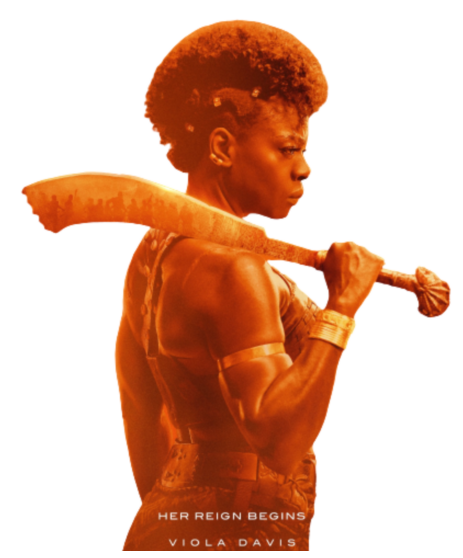

In [27]:
image = np.array(Image.open("thewomanking.png"))              # Import The woman king movie image
    
plt.figure(figsize=[15,10], facecolor="none")                 # Instantiate the figure object

plt.imshow(image, cmap=plt.cm.gray, interpolation="bilinear") # Display data as an image
plt.axis("off")                                               # Remove axis
plt.show()                                                    # Display image

In [29]:
#define a function to design the backgorund of word cloud object

def word_color_func(word, font_size, position, orientation="horizontal", random_state=None,**kwargs):
    return "hsl(34, 99%%, %d%%)" % random.randint(50, 80)

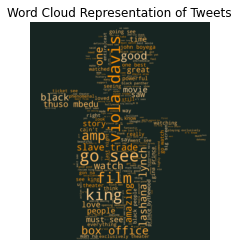

<Figure size 432x288 with 0 Axes>

In [30]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='#172522', mask=image)

# generate the word cloud
twitter_wc.generate(tweets_list_string)

# display the word cloud
plt.figure()


plt.imshow(twitter_wc.recolor(color_func = word_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Representation of Tweets");
plt.show()

# store to file
plt.savefig("womancloud.png", format="png")
plt.show()

Text(0.5, 1.0, 'Twitter Users Sentiments')

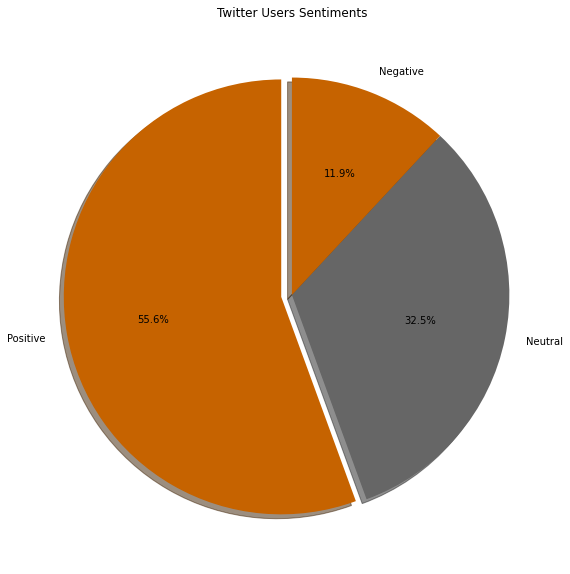

In [31]:
#Plotting a pie chart to show distribution of Sentiments

labels = "Positive", "Neutral", "Negative"
explode = (0.05, 0, 0)                                              # only "explode" the first slice (i.e. 'positive')
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(sentiment_df, labels=labels, colors=['#c66300', '#666666'], 
        startangle=90, shadow=True, explode=explode, autopct='%1.1f%%');
plt.title('Twitter Users Sentiments')

In [32]:
#define a function to clean location and removie unwanted characters

def processing_location(location):
    location = re.sub(r'\@\w+|\#\w+|\d+', '',  location)                          # Cleaning and removing repeating characters
    location_tokens = word_tokenize(location)
    filter_words = [w for w in location_tokens if w not in emojis]
    unpunctuated_words = [w for w in filter_words if w not in string.punctuation] # Cleaning and removing punctuations
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemmatized_words)

In [33]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.

womanKing_df['cleaned_location'] = womanKing_df['location'].apply(processing_location)
womanKing_df.head()

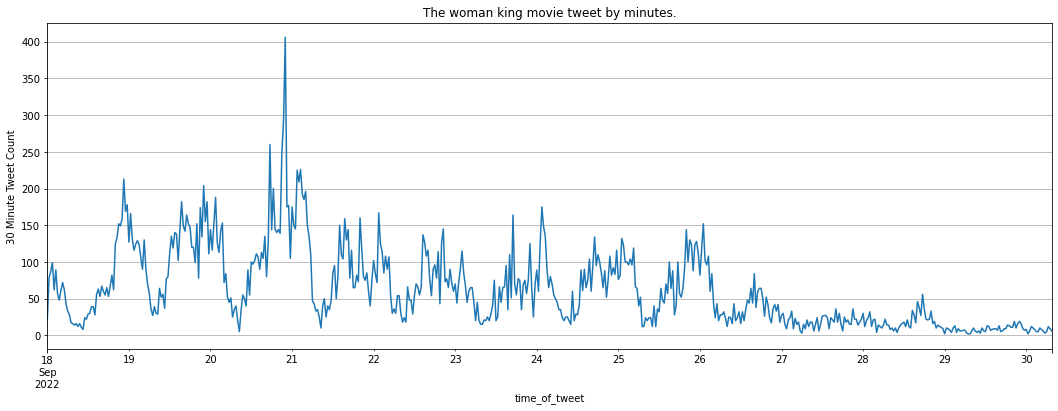

In [34]:
tweet_time_df = womanKing_df.groupby(pd.Grouper(key='time_of_tweet', freq='30Min', convention='start')).size()
tweet_time_df.plot(figsize=(18,6))
plt.ylabel("30 Minute Tweet Count")
plt.title("The woman king movie tweet by minutes.")
plt.grid(True)

# 6. Conclusion
The woman king final save to csv file an imported to Tableau for visualization

In [ ]:
#save the final dataframe to csv to import to Taleau for visualization

womanKing_df.to_csv("womanking_final_file.csv", index=False)